In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.modeling.functional_models import Gaussian2D
from astropy.modeling import models, fitting

In [2]:
def BinCenters(bin_edges):
    return (bin_edges[1:]+bin_edges[0:-1])/2.

In [3]:
# Let's make an image to hold just one source, with x and y coordinates
Npix = 21
sigma_source = 3.
center = int(Npix/2)
x_coord, y_coord = np.meshgrid(np.arange(Npix), np.arange(Npix))

In [4]:
# Let's constrain the (x,y) position to be toward the center
x0 = stats.uniform.rvs(center-4,center+4)
y0 = stats.uniform.rvs(center-4,center+4)

In [16]:
# We now need to pick a brightness and a level for the random error per pixel
brightness = 10.
sigma_noise = 0.5 

In [17]:
# Make the image
gaussian = Gaussian2D()
signal = gaussian.evaluate(x_coord,y_coord, amplitude=brightness, x_mean=x0, y_mean=y0, 
                           x_stddev=sigma_source, y_stddev=sigma_source, theta=0)
# Make the noise
noise = stats.norm.rvs(loc=0, scale=sigma_noise, size = [Npix, Npix])

# And the sum (the data)
data = signal + noise

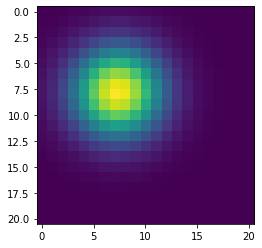

In [18]:
# Show the signal
plt.imshow(signal)

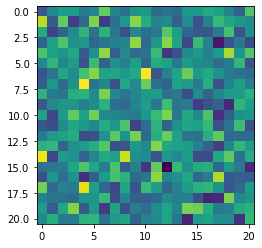

In [19]:
# Show the noise
plt.imshow(noise)

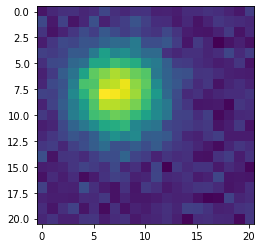

In [20]:
# and the sum
plt.imshow(data)

In [37]:
# initialize a fitter
source_fitter = fitting.LevMarLSQFitter()
# initialize a model.  Put initial guess here, which we will assume is at the center of the image.
source_model = models.Gaussian2D(amplitude=10, x_mean=center, y_mean=center, 
                                 x_stddev=sigma_source, y_stddev=sigma_source, theta=0)
# Actually do the fit
fitted_source = source_fitter(source_model, x_coord, y_coord, data)

In [38]:
fitted_source

<Gaussian2D(amplitude=10.09976922, x_mean=7.24153776, y_mean=7.80737521, x_stddev=3.04030099, y_stddev=3.01557895, theta=0.31238695)>

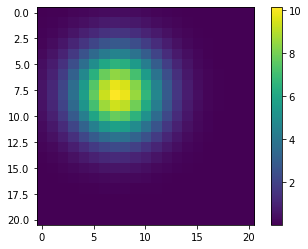

In [34]:
# Look at the fitted source (sanity check)
plt.imshow(fitted_source(x_coord, y_coord))
plt.colorbar()
plt.show()

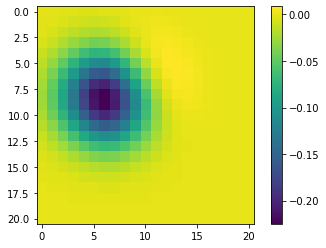

In [35]:
# Look at the difference between the fitted source and the original (no noise)
plt.imshow(signal - fitted_source(x_coord, y_coord))
plt.colorbar()
plt.show()

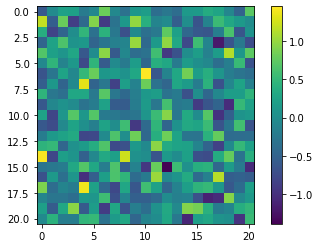

In [36]:
# And now the difference between model and data
plt.imshow(data - fitted_source(x_coord, y_coord))
plt.colorbar()
plt.show()

Notice that astropy also fit for the x and y width and the rotation angle theta.  Let's now assume that we actually know these exactly and *don't* want to fit for them.  We need to provide a constraint on these parameters, that they are *fixed*.  `astropy.modelling` provides a way to do this: https://docs.astropy.org/en/stable/modeling/parameters.html#parameter-constraints

In [39]:
source_model.x_stddev.fixed = True
source_model.y_stddev.fixed = True
source_model.theta.fixed = True

# Re-do the fit
fitted_source = source_fitter(source_model, x_coord, y_coord, data)
fitted_source

<Gaussian2D(amplitude=10.19307682, x_mean=7.24128972, y_mean=7.80699201, x_stddev=3., y_stddev=3., theta=0.)>